# Лабораторная работа № 3.2.1 (4.7). Сдвиг фаз в цепи переменного тока

In [25]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
%matplotlib inline
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

C = np.float64(0.5 * 10**(-6)) # Ёмкость, Ф
L = 0.05  # Индуктивность, Гн
Omega = 1000 * 2 * 3.14  # Циклическая частота
R_L = 32.5  # Сопротивление картушки, Ом
r = 12.4  # Сопротивление

## Введение и краткая теория

Колебательный контур - довольно полезная штука. В данной работе предлагается исследовать это дело, а конкретно - сдвиг фаз.    
Из уравнения вынужденных колебаний $\normalsize RI + U_C = -L  \frac{dI}{dt} + \xi _0 cos(\Omega t + \theta)$  
можно найти обобщённое уравнение закона Ома для цепи переменного тока:
$\hat{\xi_0} = Z \hat{I_0}$, где $Z=R+i(\Omega L - \large \frac{1}{\Omega L})$ - импеданс колебательного контура (аналог сопротивления в обычном законе Ома).  
Представляя $Z$ в показательной форме $-$ $Z = Z_0 e^{i\psi}$ $-$ получим, что $\psi = arctg \large \frac{\Omega L - \frac{1}{\Omega C}}{R}$  (1)
Из закона Ома получим, что $I = \large \frac{\xi_0}{Z_0} \normalsize cos(\Omega t + \varphi - \psi)$  
А закон напряжения $\xi = \xi _0 cos(\Omega t + \theta)$  
То есть ток отстаёт от напряжения на $\psi$

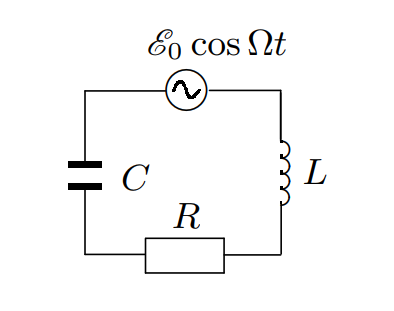

## Установка

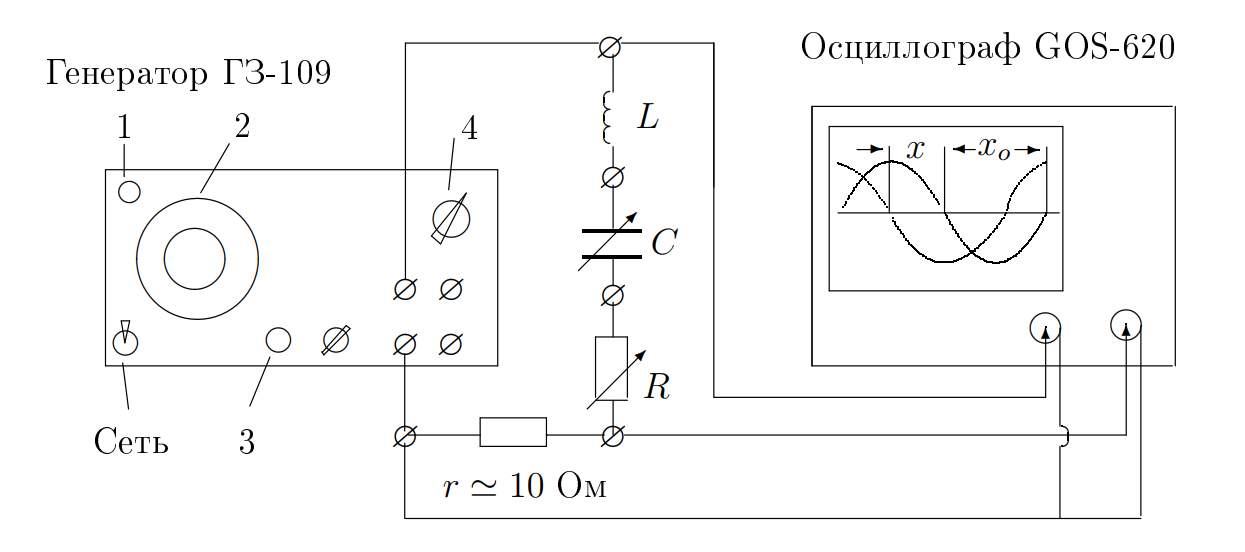

Вроде всё ясно. С помощью генератора мы поддерживаем колебания; катушка, коденсатор (магазин ёмкостей) и резистор (магазин сопротивлений; мы считаем, в нём сосредоточено всё активное сопротивление цепи) подключены последовательно (как на предыдущем рисунке). Сигнал, пропорциональный току, снимается с сопротивления $r$, пропорциональный напряжению - с генератора, подаются на разные каналы осфиллографа и в итоге мы видим две синусоиды, смещённые друг относительно друга. Это смещёние мы как раз и будем измерять

## Обработка результатов

### Пункт 1
Для $RC$-цепи найдем зависимости $\psi$ = $f({R_\Sigma})$ и $ctg(\psi)$ = $f(\Omega C {R_\Sigma})$, где ${R_\Sigma}$ = R + r &mdash; это суммарное активное сопротивление цепи, $\psi$ = $\large \frac{\pi x}{x_0}$ - сдвиг фаз, $\Omega$ = 1 КГц - частота генератора, $C$ = 0.5 мкФ - ёмкость конденсатора, а r $\approx$ 10 Ом - сопротивление резистора. (Таблица 1):


| $R_\Sigma$, Ом | 10 | 30 | 50 | 90 | 160 | 240 | 350 | 570 | 
|-------|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| $x_0$, см | 3,7 | 3,4 | 3,4 | 3,4 | 3,4 | 3,4 | 3,4 | 3,4|
| $x$, см | 1,8 | 1,6 | 1,5 | 1,4 | 1,2 | 1 | 0,8 | 0,6 |
|$\psi$, рад| 1,53 | 1,48 | 1,39 | 1,29 | 1,11 | 0,92 | 0,74 | 0,55 |
|$\Omega CR_\Sigma$, $10^{-3}$| 31.4 | 94.2 | 157.0 | 282.6 | 502.4 | 753.6 | 1099.0 | 1789.8 |
|$ctg$$(\psi)$| 0,042 | 0,093 | 0,187 | 0,285 | 0,498 | 0,755 | 1,097 | 1,615 

<br>
<div style="text-align: center">Таблица 1. Зависимость сдвига фазы от сопротивления для RC-цепи</div>

Построим эти зависимости на графиках (рис 1 и 2):

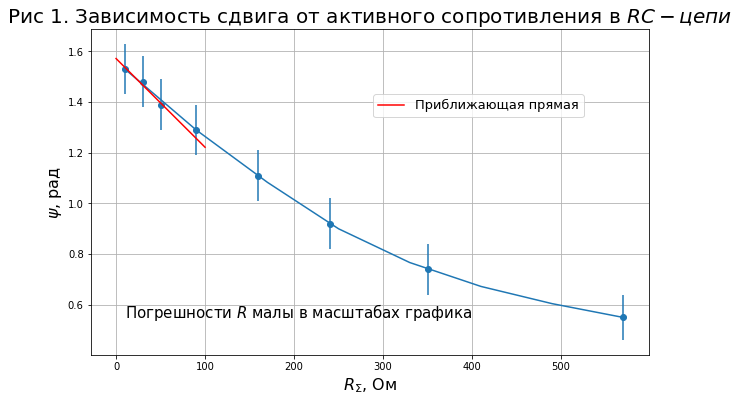

In [81]:
# График 1
y = np.array([1.53, 1.48, 1.39, 1.29, 1.11, 0.92, 0.74, 0.55])  # Сдвиг фазы
x = np.array([10, 30, 50, 90, 160, 240, 350, 570])  # Активное сопротивление, погрешности малы

# Рассчёт погрешностей сдвига
x_0 = np.array([3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4])
x_x = np.array([1.8, 1.6, 1.5, 1.4, 1.2, 1.0, 0.8, 0.6])
x_error = 0.1  # Погрешность измерения
y_errors = np.array([(k * ((x_error/i)**2 + (x_error/j)**2)**0.5).round(2) for i, j, k in zip(x_0, x_x, y)])

fig = plt.figure(figsize=(10, 6))  # (Размер графика)
plt.title('Рис 1. Зависимость сдвига от активного сопротивления в $RC-цепи$', fontsize=20)
plt.xlabel('$R_\Sigma$, Ом', fontdict=dict(size=16))
plt.ylabel('$\psi$, рад', fontdict=dict(size=16))
plt.grid(True)  # сетка

# Интерполирующая функция
f = interp1d(x, y, kind='cubic')
xnew = np.linspace(x.min(), x.max(), 8)

# Точки для линейной экстраполяции
x_for_extr = x[:-5:]
y_for_extr = y[:-5:]
# Прямая по МНК
A = np.vstack([x_for_extr, np.ones(len(x_for_extr))]).T
a, b = np.linalg.lstsq(A, y_for_extr, rcond=None)[0]
x_extr = np.linspace(0, 2*x_for_extr.max(), 10)
# a - коэффициент наклона прямой, b - свободный член

# Вывести точки и погрешности
plt.scatter(x,y)
plt.errorbar(x, y, yerr=y_errors, ecolor='#1f77b4', linestyle='None')
# Вывести график
plt.plot(xnew, f(xnew))
# Вывести приближающую прямую
plt.plot(x_extr, a*x_extr + b, 'r', label='Приближающая прямая')
# Вывести легенду
plt.legend(
    loc='upper right',
    borderaxespad=5,
    prop={'size': 13}
)

plt.annotate(
    'Погрешности $R$ малы в масштабах графика',
    xy=(x[6], y[6]),
    xytext=(x.min(), y.min()),
    fontsize=15
)

plt.show()

In [82]:
# Определим погрешности коэффициентов a и b для 1 графика
x_avg = np.average(x_for_extr)
y_avg = np.average(y_for_extr)
x_sqr_avg = np.average([i**2 for i in x_for_extr])
y_sqr_avg = np.average([i**2 for i in y_for_extr])
a_err = (((y_sqr_avg - y_avg**2)/(x_sqr_avg - x_avg**2) - a**2)/len(x_for_extr))**0.5
b_err = a_err * (x_sqr_avg - x_avg**2)**0.5
print ('Наклон: a = ', a.round(4), '+/-', a_err.round(4))
print ('Высота: b = ', b.round(3), '+/-', b_err.round(3))

Наклон: a =  -0.0035 +/- 0.0003
Высота: b =  1.572 +/- 0.005


In [83]:
# Посчитаем теоретическоре значение R (из формулы 1) и из графика для сдвига pi/2
R_prac = ((1.57 - b)/a).round(2)
R_prac_err = (R_prac * ((b_err/b)**2 + (a_err/a)**2)**0.5).round(2)
R_th = 0  # Так как tg(pi/2) = +inf
print('Из графика: R=(', R_prac,'+/-', R_prac_err, ') Ом\nТеоретическое: ', R_th, 'Ом')

Из графика: R=( 0.48 +/- 0.05 ) Ом
Теоретическое:  0 Ом


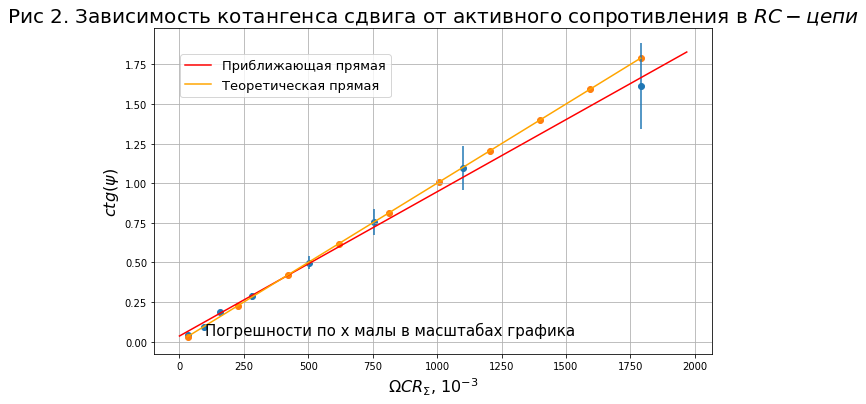

In [84]:
# График 2
y = np.array([0.042, 0.093, 0.187, 0.285, 0.498, 0.755, 1.097, 1.615])  # ctg(psi)
x = np.array([31.4, 94.2, 157.0, 282.6, 502.4, 753.6, 1099.0, 1789.8])

#Погрешности сдвига фазы
x_0 = np.array([3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4])
x_x = np.array([1.8, 1.6, 1.5, 1.4, 1.2, 1.0, 0.8, 0.6])
x_0_error = 0.1
x_error = 0.1
y_errors = np.array([(k * ((x_0_error/i)**2 + (x_error/j)**2)**0.5).round(2) for i, j, k in zip(x_0, x_x, y)])

fig = plt.figure(figsize=(10, 6))  # (Размер графика)
plt.title('Рис 2. Зависимость котангенса сдвига от активного сопротивления в $RC-цепи$', fontsize=20)
plt.xlabel('$\Omega CR_\Sigma$, $10^{-3}$', fontdict=dict(size=16))
plt.ylabel('$ctg(\psi)$', fontdict=dict(size=16))
plt.grid(True)  # сетка

# Интерполирующая функция
f = interp1d(x, y, kind='cubic')
xnew = np.linspace(x.min(), x.max(), 8)

# Точки для линейной экстраполяции
x_for_extr = x#[:-1:]
y_for_extr = y#[:-1:]
# Прямая по МНК
A = np.vstack([x_for_extr, np.ones(len(x_for_extr))]).T
a, b = np.linalg.lstsq(A, y_for_extr, rcond=None)[0]
x_extr = np.linspace(0, 1.1*x_for_extr.max(), 10)
# a - коэффициент наклона прямой, b - свободный член

# Вывести точки и погрешности
plt.scatter(x,y)
plt.errorbar(x, y, yerr=y_errors, ecolor='#1f77b4', linestyle='None')
# Вывести приближающую прямую
plt.plot(x_extr, a*x_extr + b, 'r', label='Приближающая прямая')
# Вывести теоретическую зависимость

x_theor = np.linspace(x.min(), x.max(), 10)
y_theor = np.array([i/1000 for i in x_theor])
plt.scatter(x_theor, y_theor)
plt.plot(x_theor, y_theor, 'orange', label='Теоретическая прямая')

# Вывести легенду
plt.legend(
    loc='upper left',
    borderaxespad=2,
    prop={'size': 13}
)

plt.annotate(
    'Погрешности по x малы в масштабах графика',
    xy=(x[6], y[6]),
    xytext=(100, y.min()),
    fontsize=15
)

plt.show()

In [85]:
# Определим погрешности коэффициентов a и b для второго графика
x_avg = np.average(x_for_extr)
y_avg = np.average(y_for_extr)
x_sqr_avg = np.average([i**2 for i in x_for_extr])
y_sqr_avg = np.average([i**2 for i in y_for_extr])
a_err = ((((y_sqr_avg - y_avg**2)/(x_sqr_avg - x_avg**2) - a**2)/len(x_for_extr))**0.5)
b_err = (a_err * (x_sqr_avg - x_avg**2)**0.5)
print ('Наклон: a = ', a.round(5), '+/-', a_err.round(5))
print ('Высота: b = ', b.round(2), '+/-', b_err.round(2))

Наклон: a =  0.00091 +/- 2e-05
Высота: b =  0.04 +/- 0.01


Определим с помощью первого графика $R$ при $\psi$ = $\large \frac{\pi}{2}$. Получам $R = (0.48\pm0.05)\,Ом$. Из теоретического значения по формуле $\psi = arctg \large \frac{\Omega L - \frac{1}{\Omega C}}{R}$ получим, что $R = 0\,Ом$. Ко второму добавим теоретическую зависимость. Видно, что теоретическая прямая проходит в пределах погрешности эксперимента, а значение R при $\psi=\large\frac{\pi}{2}$ хоть и не входит теоретическое в погрешность, но достаточно близко. Скорее всего это связано с тем, что значение находилось линейной экстраполяцией, а должны были быть измерены значения так, чтобы находить интерполяцией, что было бы точнее

### Пункт 2
Для $RL$-цепи аналогично найдем зависимости и построим графики $\psi$ = $f({R_\Sigma})$ и $ctg(\psi)$ = $f(\large \frac{R_\Sigma}{\Omega L})$, где ${R_\Sigma}$ = $R + r + R_L$ - это суммарное активное сопротивление цепи, $R_L = Ом$, а $L$ = 50 Гн. (Таблица 2, графики 3, 4):


| $R_\Sigma$, Ом | 324 | 424 | 494 | 584 | 704 | 894 | 1264 |
|-|-|-|-|-|-|-|-|
| **$x_0$, см** | 3,4 | 3,4 | 3,4 | 3,4 | 3,4 | 3,4 | 3,4 |
| **$x$, см** | 1,5 | 1,2 | 1 | 0,8 | 0,6 | 0,4 | 0,2 |
|$\psi$| 1,39 | 1,11 | 0,92 | 0,74 | 0,55 | 0,37 | 0,18 |
|$ctg$$(\psi)$| 0,187 | 0,498 | 0,755 | 1,097 | 1,615 | 2,581 | 5,350 |
|$\normalsize\frac{R_\Sigma}{\Omega L}$| 6,48 | 8,48 | 9,88 | 11,68 | 14,08 | 17,88 | 25,28 |

<br>
<div style="text-align: center">Табл 2. Зависимость сдвига фазы от сопротивления в RL-цепи</div>

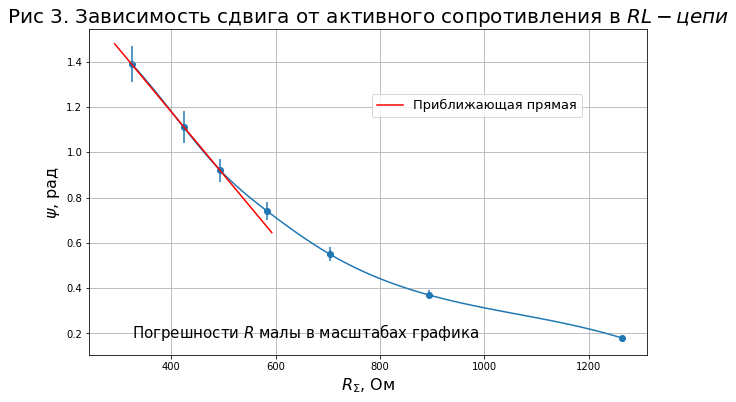

In [86]:
# График зависимости сдвига от сопротивления (3 график)
y = np.array([1.39, 1.11, 0.92, 0.74, 0.55, 0.37, 0.18])  # Сдвиг фазы
x = np.array([324, 424 , 494, 584, 704, 894, 1264])  # Активное сопротивление, погрешности малы

# Рассчёт погрешностей сдвига
x_0 = np.array([3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4])
x_error = 0.2
y_errors = np.array([(k * ((x_error/i)**2 + (x_error/j)**2)**0.5).round(2) for i, j, k in zip(x_0, x, y)])

fig = plt.figure(figsize=(10, 6))  # (Размер графика)
plt.title('Рис 3. Зависимость сдвига от активного сопротивления в $RL-цепи$', fontsize=20)
plt.xlabel('$R_\Sigma$, Ом', fontdict=dict(size=16))
plt.ylabel('$\psi$, рад', fontdict=dict(size=16))
plt.grid(True)  # сетка

# Интерполирующая функция
f = interp1d(x, y, kind='cubic')
xnew = np.linspace(x.min(), x.max(), 100)

# Точки для линейной экстраполяции
x_for_extr = x[:-4:]
y_for_extr = y[:-4:]
# Прямая по МНК
A = np.vstack([x_for_extr, np.ones(len(x_for_extr))]).T
a, b = np.linalg.lstsq(A, y_for_extr, rcond=None)[0]
x_extr = np.linspace(0.9*x_for_extr.min(), 1.2*x_for_extr.max(), 10)
# a - коэффициент наклона прямой, b - свободный член

# Вывести точки и погрешности
plt.scatter(x,y)
plt.errorbar(x, y, yerr=y_errors, ecolor='#1f77b4', linestyle='None')
# Вывести график
plt.plot(xnew, f(xnew))
# Вывести приближающую прямую
plt.plot(x_extr, a*x_extr + b, 'r', label='Приближающая прямая')
# Вывести легенду
plt.legend(
    loc='upper right',
    borderaxespad=5,
    prop={'size': 13}
)

plt.annotate(
    'Погрешности $R$ малы в масштабах графика',
    xy=(x[6], y[6]),
    xytext=(x.min(), y.min()),
    fontsize=15
)

plt.show()

In [87]:
# Определим погрешности коэффициентов a и b для 3 графика
x_avg = np.average(x_for_extr)
y_avg = np.average(y_for_extr)
x_sqr_avg = np.average([i**2 for i in x_for_extr])
y_sqr_avg = np.average([i**2 for i in y_for_extr])
a_err = (((y_sqr_avg - y_avg**2)/(x_sqr_avg - x_avg**2) - a**2)/len(x_for_extr))**0.5
b_err = a_err * (x_sqr_avg - x_avg**2)**0.5
print ('Наклон: a = ', a.round(5), '+/-', a_err.round(5))
print ('Высота: b = ', b.round(3), '+/-', b_err.round(3))

Наклон: a =  -0.00277 +/- 1e-05
Высота: b =  2.286 +/- 0.001


In [88]:
# Посчитаем теоретическоре значение R и из графика
R_prac = ((1.57 - b)/a).round(0)
R_prac_err = (R_prac * ((b_err/b)**2 + (a_err/a)**2)**0.5).round(0)
R_th = 0 # = ???????
print('Из графика: R = (', R_prac,'+/-', R_prac_err, ') Ом', '\nТеоретическое: R = вот тут чет непонятно сколько', 'Ом')

Из графика: R = ( 259.0 +/- 1.0 ) Ом 
Теоретическое: R = вот тут чет непонятно сколько Ом


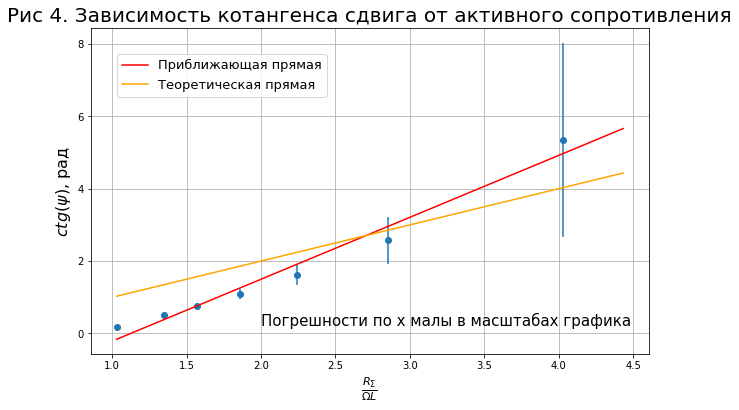

In [89]:
# График 4
x = np.array([1.03, 1.35, 1.57, 1.86, 2.24, 2.85, 4.03])  # R/Omega*L
y = np.array([0.187, 0.498, 0.755, 1.097, 1.615, 2.581, 5.350])  # ctg(psi)

# Погрешность сдвига фазы
x_0 = np.array([3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4])
x_x = np.array([1.5, 1.2, 1, 0.8, 0.6, 0.4, 0.2])
x_0_error = 0.1
x_error = 0.1
y_errors = np.array([(k * ((x_0_error/i)**2 + (x_error/j)**2)**0.5).round(2) for i, j, k in zip(x_0, x_x, y)])


fig = plt.figure(figsize=(10, 6))  # (Размер графика)
plt.title('Рис 4. Зависимость котангенса сдвига от активного сопротивления', fontsize=20)
plt.xlabel('$\\frac{R_\Sigma}{\Omega L}$', fontdict=dict(size=16))
plt.ylabel('$ctg(\psi)$, рад', fontdict=dict(size=16))
plt.grid(True)  # сетка

# Интерполирующая функция
f = interp1d(x, y, kind='cubic')
xnew = np.linspace(x.min(), x.max(), 8)

# Точки для линейной экстраполяции
x_for_extr = x#[:-1:]
y_for_extr = y#[:-1:]
# Прямая по МНК
A = np.vstack([x_for_extr, np.ones(len(x_for_extr))]).T
a, b = np.linalg.lstsq(A, y_for_extr, rcond=None)[0]
x_extr = np.linspace(x_for_extr.min(), 1.1*x_for_extr.max(), 10)
# a - коэффициент наклона прямой, b - свободный член



# Вывести точки и погрешности
plt.scatter(x,y)
plt.errorbar(x, y, yerr=y_errors, ecolor='#1f77b4', linestyle='None')
# Вывести приближающую прямую
plt.plot(x_extr, a*x_extr + b, 'r', label='Приближающая прямая')
# Теоретический график
x_theor = np.linspace(x.min(), 1.1*x.max(), 10)
plt.plot(x_theor, x_theor, 'orange', label='Теоретическая прямая')
# Вывести легенду
plt.legend(
    loc='upper left',
    borderaxespad=2,
    prop={'size': 13}
)

plt.annotate(
    'Погрешности по x малы в масштабах графика',
    xy=(x[6], y[6]),
    xytext=(2, 0.2),
    fontsize=15
)

plt.show()

Из графика на (рис 3) получаем $R = (2.59\pm0.01)*10^2 \, Ом$ для $\psi=\large \frac{\pi}{2}$.  
Видим, что здесь от теории отличается сильнее, чем в предыдущем. Из графиков видно, что угол наклона отличается примерно в 2 раза

### Пункт 3

Теперь для $RLC$-цепи посмотрим на зависимость $\psi$ = $f(\large \frac{\nu}{\nu_0})$ для $R$ = 0 Ом и $R$ = 50 Ом (Таблицы 3 и 4, рис 5)

| $\nu$, Гц | 930 | 950 | 970 | 990 | 1010 | 1060 | 1080 | 1110 | 1210 |
|:-:|-|-|-|-|-|-|-|-|-|
| $\bf\large\frac{\nu}{\nu_0}$ | 1,000 | 1,022 | 1,043 | 1,065 | 1,086 | 1,140 | 1,161 | 1,194 | 1,301 |
| **$x_0$, см** | 3,6 | 3,6 | 3,4 | 3,4 | 3,3 | 3,2 | 3,2 | 3 | 2,8 |
| **$x$, см** | 1 | 0,8 | 0,6 | 0,4 | 0,2 | 0,4 | 0,6 | 0,8 | 1 |
|$\psi$| 0,28 | 0,22 | 0,18 | 0,12 | 0,06 | 0,13 | 0,19 | 0,27 | 0,36 |

<br>
<div style="text-align: center">Таблица 3. Зависимость сдвига фазы от частоты для RLC-цепи при R=0 Ом</div>

| $\nu$, Гц | 840 | 870 | 910 | 950 | 1000 | 1080 | 1140 | 1220 |
|-|-|-|-|-|-|-|-|-|
| $\bf\large\frac{\nu}{\nu_0}$ | 1,000 | 1,036 | 1,083 | 1,131 | 1,190 | 1,286 | 1,357 | 1,452 |
| **$x_0$, см** | 4,1 | 3,9 | 3,6 | 3,6 | 3,4 | 3,1 | 3 | 2,8 |
| **$x$, см** | 1 | 0,8 | 0,6 | 0,4 | 0,2 | 0,2 | 0,4 | 0,6 |
|$\psi$| 0,24 | 0,21 | 0,17 | 0,11 | 0,06 | 0,06 | 0,13 | 0,21 |

<br>
<div style="text-align: center">Таблица 4. Зависимость сдвига фазы от частоты для RLC-цепи при R=50 Ом</div>

In [27]:
# Погрешности сдыига фазы в обоих случаях
y1 = np.array([0.28, 0.22, 0.18, 0.12, 0.06, 0.13, 0.19, 0.27, 0.36])  # Сдвиг фазы 
x1_0 = np.array([3.6, 3.6, 3.4, 3.4, 3.3, 3.2, 3.2, 3, 2.8])
x1 = np.array([1, 0.8, 0.6, 0.4, 0.2, 0.4, 0.6, 0.8, 1])
x1_0_error = 0.1
x1_error = 0.1
y1_errors = np.array([(k * ((x1_0_error/i)**2 + (x1_error/j)**2)**0.5).round(2) for i, j, k in zip(x1_0, x1, y1)])

y2 = np.array([0.24, 0.21, 0.17, 0.11, 0.06, 0.06, 0.13, 0.21])  # Сдвиг фазы 
x2_0 = np.array([4.1, 3.9, 3.6, 3.6, 3.4, 3.1, 3, 2.8])
x2 = np.array([1, 0.8, 0.6, 0.4, 0.2, 0.2, 0.4, 0.6])
x2_0_error = 0.1
x2_error = 0.1
y2_errors = np.array([(k * ((x2_0_error/i)**2 + (x2_error/j)**2)**0.5).round(2) for i, j, k in zip(x2_0, x2, y2)])

print(y1_errors, y2_errors)

[0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.04] [0.02 0.03 0.03 0.03 0.03 0.03 0.03 0.04]


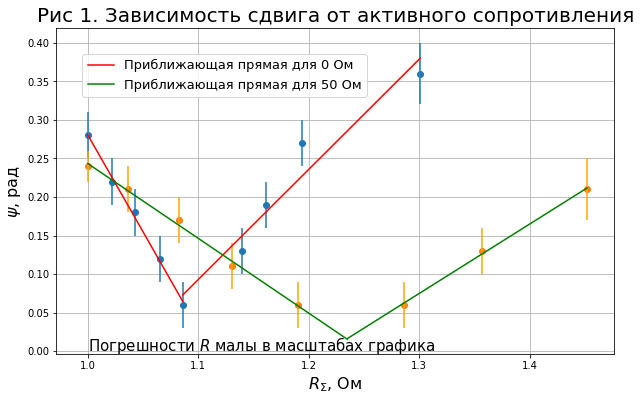

In [39]:
x1 = np.array([1, 1.022, 1.043, 1.065, 1.086, 1.140, 1.161, 1.194, 1.301])
y1 = np.array([0.28, 0.22, 0.18, 0.12, 0.06, 0.13, 0.19, 0.27, 0.36])

x2 = np.array([1, 1.036, 1.083, 1.131, 1.190, 1.286, 1.357, 1.452])
y2 = np.array([0.24, 0.21, 0.17, 0.11, 0.06, 0.06, 0.13, 0.21])

#Для 0 Ом

fig = plt.figure(figsize=(10, 6))  # (Размер графика)
plt.title('Рис 1. Зависимость сдвига от активного сопротивления', fontsize=20)
plt.xlabel('$R_\Sigma$, Ом', fontdict=dict(size=16))
plt.ylabel('$\psi$, рад', fontdict=dict(size=16))
plt.grid(True)  # сетка

# Интерполирующая функция
f = interp1d(x1, y1, kind='cubic')
x1new = np.linspace(x1.min(), x1.max(), 8)

# Точки для линейной экстраполяции левой ветви
x11_for_extr = x1[:5:]
y11_for_extr = y1[:5:]
# Левая ветвь по МНК
A11 = np.vstack([x11_for_extr, np.ones(len(x11_for_extr))]).T
a11, b11 = np.linalg.lstsq(A11, y11_for_extr, rcond=None)[0]
x11_extr = np.linspace(x1[0], x11_for_extr.max(), 10)
# a11 - коэффициент наклона прямой, b11 - свободный член

# Точки для линейной экстраполяции левой ветви
x12_for_extr = x1[4::]
y12_for_extr = y1[4::]
# Левая ветвь по МНК
A12 = np.vstack([x12_for_extr, np.ones(len(x12_for_extr))]).T
a12, b12 = np.linalg.lstsq(A12, y12_for_extr, rcond=None)[0]
x12_extr = np.linspace(x1[4], x12_for_extr.max(), 10)
# a12 - коэффициент наклона прямой, b12 - свободный член

# Вывести точки и погрешности
plt.scatter(x1,y1)
plt.errorbar(x1, y1, yerr=y1_errors, ecolor='#1f77b4', linestyle='None')
# Вывести график
#plt.plot(xnew, f(xnew))
# Вывести приближающую прямую
plt.plot(x11_extr, a11*x11_extr + b11, 'r', label='Приближающая прямая для 0 Ом')
plt.plot(x12_extr, a12*x12_extr + b12, 'r')

#Для 50 Ом

# Интерполирующая функция
f = interp1d(x2, y2, kind='cubic')
x2new = np.linspace(x2.min(), x2.max(), 8)

# Точки для линейной экстраполяции левой ветви
x21_for_extr = x2[:5:]
y21_for_extr = y2[:5:]
# Левая ветвь по МНК
A21 = np.vstack([x21_for_extr, np.ones(len(x21_for_extr))]).T
a21, b21 = np.linalg.lstsq(A21, y21_for_extr, rcond=None)[0]
x21_extr = np.linspace(x2[0], 1.235, 10)
# a11 - коэффициент наклона прямой, b11 - свободный член

# Точки для линейной экстраполяции левой ветви
x22_for_extr = x2[5::]
y22_for_extr = y2[5::]
# Левая ветвь по МНК
A22 = np.vstack([x22_for_extr, np.ones(len(x22_for_extr))]).T
a22, b22 = np.linalg.lstsq(A22, y22_for_extr, rcond=None)[0]
x22_extr = np.linspace(1.235, x22_for_extr.max(), 10)
# a12 - коэффициент наклона прямой, b12 - свободный член

# Вывести точки и погрешности
plt.scatter(x2,y2)
plt.errorbar(x2, y2, yerr=y2_errors, ecolor='orange', linestyle='None')
# Вывести график
#plt.plot(xnew, f(xnew))
# Вывести приближающую прямую
plt.plot(x21_extr, a21*x21_extr + b21, 'g', label='Приближающая прямая для 50 Ом')
plt.plot(x22_extr, a22*x22_extr + b22, 'g')
# Вывести легенду
plt.legend(
    loc='upper left',
    borderaxespad=2,
    prop={'size': 13}
)

plt.annotate(
    'Погрешности $R$ малы в масштабах графика',
    xy=(x1[6], y1[6]),
    xytext=(1, 0),
    fontsize=15
)

plt.show()

In [55]:
# Определим погрешности коэффициентов a и b
x11_avg = np.average(x11_for_extr)
y11_avg = np.average(y11_for_extr)
x11_sqr_avg = np.average([i**2 for i in x11_for_extr])
y11_sqr_avg = np.average([i**2 for i in y11_for_extr])
a11_err = ((((y11_sqr_avg - y11_avg**2)/(x11_sqr_avg - x11_avg**2) - a11**2)/len(x11_for_extr))**0.5)
b11_err = (a11_err * (x11_sqr_avg - x11_avg**2)**0.5) + y1_errors[0]


x12_avg = np.average(x12_for_extr)
y12_avg = np.average(y12_for_extr)
x12_sqr_avg = np.average([i**2 for i in x12_for_extr])
y12_sqr_avg = np.average([i**2 for i in y12_for_extr])
a12_err = ((((y12_sqr_avg - y12_avg**2)/(x12_sqr_avg - x12_avg**2) - a12**2)/len(x12_for_extr))**0.5)
b12_err = (a12_err * (x12_sqr_avg - x12_avg**2)**0.5)


x21_avg = np.average(x21_for_extr)
y21_avg = np.average(y21_for_extr)
x21_sqr_avg = np.average([i**2 for i in x21_for_extr])
y21_sqr_avg = np.average([i**2 for i in y21_for_extr])
a21_err = ((((y21_sqr_avg - y21_avg**2)/(x21_sqr_avg - x21_avg**2) - a21**2)/len(x21_for_extr))**0.5)
b21_err = (a21_err * (x21_sqr_avg - x21_avg**2)**0.5) + y2_errors[0]


x22_avg = np.average(x22_for_extr)
y22_avg = np.average(y22_for_extr)
x22_sqr_avg = np.average([i**2 for i in x22_for_extr])
y22_sqr_avg = np.average([i**2 for i in y22_for_extr])
a22_err = ((((y22_sqr_avg - y22_avg**2)/(x22_sqr_avg - x22_avg**2) - a22**2)/len(x22_for_extr))**0.5)
b22_err = (a22_err * (x22_sqr_avg - x22_avg**2)**0.5) + y2_errors[-1]


print ('Наклон левой ветви для 0 Ом: a = ', a11.round(2), '+/-', a11_err.round(2))
print ('Высота левой ветви для 0 Ом: b = ', b11.round(2), '+/-', b11_err.round(2), '\n')
print ('Наклон правой ветви для 0 Ом: a = ', a12.round(1), '+/-', a12_err.round(1))
print ('Высота правой ветви для 0 Ом: b = ', b12.round(2), '+/-', b12_err.round(2), '\n')
print ('Наклон левой ветви для 50 Ом: a = ', a21.round(2), '+/-', a21_err.round(2))
print ('Высота левой ветви для 50 Ом: b = ', b21.round(2), '+/-', b21_err.round(2), '\n')
print ('Наклон правой ветви для 50 Ом: a = ', a22.round(2), '+/-', a22_err.round(2))
print ('Высота правой ветви для 50 Ом: b = ', b22.round(2), '+/-', b22_err.round(2))

Наклон левой ветви для 0 Ом: a =  -2.51 +/- 0.07
Высота левой ветви для 0 Ом: b =  2.79 +/- 0.03 

Наклон правой ветви для 0 Ом: a =  1.4 +/- 0.2
Высота правой ветви для 0 Ом: b =  -1.48 +/- 0.01 

Наклон левой ветви для 50 Ом: a =  -0.97 +/- 0.03
Высота левой ветви для 50 Ом: b =  1.21 +/- 0.02 

Наклон правой ветви для 50 Ом: a =  0.9 +/- 0.02
Высота правой ветви для 50 Ом: b =  -1.1 +/- 0.04


In [56]:
x1 = (1/4 - b11)/a11
x2 = (1/4 - b12)/a12

x3 = (1/4 - b21)/a21
x4 = (1/4 - b22)/a22

Q_0 = 1/(x2 - x1)
Q_50 = 1/(x4 - x3)

err_0 = ((((a11_err/a11)**2 + (b11_err/b11)**2)**0.5 * x1)**2 + (((a21_err/a21)**2 + (b21_err/b21)**2)**0.5 * x2)**2)**0.5
err_50 = ((((a12_err/a12)**2 + (b12_err/b12)**2)**0.5 * x3)**2 + (((a22_err/a22)**2 + (b22_err/b22)**2)**0.5 * x4)**2)**0.5

print('Добротность при 0 Ом:', Q_0.round(2), '±', err_0.round(2))
print('Добротность при 50 Ом:', Q_50.round(2), '±', err_50.round(2))

Добротность при 0 Ом: 5.05 ± 0.05
Добротность при 50 Ом: 1.99 ± 0.13


По графикам определили добротность контура по формуле $Q$ = $\large \frac{\nu_0}{2\Delta\nu}$, где $\large \frac{2\Delta\nu}{\nu_0}$ - ширина графика графика при сдвиге фаз $\psi$ = $\large \frac{\pi}{4}$  

Сравним добросность с теоретической:
$Q$ = $\large \frac{1}{R} \sqrt{\frac{L}{C}}$ 


In [94]:
Q1 = ((L/C)**0.5)/R_L
Q2 = ((L/C)**0.5)/(R_L + 50)
print ('При 0 Ом: Q =', Q1.round(2), '\nПри 50 ом: Q =', Q2.round(2))

При 0 Ом: Q = 9.73 
При 50 ом: Q = 3.83


## Выводы и результаты

На основании нашего эксперимента (в данных условиях с данным оборудованием), можно считать, что теория верна, а именно - закон ома для участка цепи и законы Кирхгофа.
Также мы убедились, что такие, казалоь бы, совершенно абстрактные и оторванные от жизни вещи, как комплексные числа, очень даже неплохо могут помочь в решении реальных физических задач!

### Отчёт подготовили: Потяшин Иван и Ярлыков Илья, группа Б05-814